<a href="https://colab.research.google.com/github/vanithakattumuri/Hands-on-Pattern-Mining/blob/main/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9: Utility Databases - Representation, Creation, and Statistics

## Install the PAMI library

In [1]:
!pip install --upgrade pami

zsh:1: command not found: pip


## Download the dataset

In [2]:
!wget -nc https://web-ext.u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv

--2025-06-17 00:21:06--  https://web-ext.u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv
Resolving web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)... 163.143.103.34
Connecting to web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)|163.143.103.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7356594 (7.0M) [text/csv]
Saving to: ‘Utility_T10I4D100K.csv’

Utility_T10I4D100K. 100%[===================>]   7.02M  8.01MB/s    in 0.9s    

2025-06-17 00:21:08 (8.01 MB/s) - ‘Utility_T10I4D100K.csv’ saved [7356594/7356594]



## Generic of Synthetic Utility Database

### Generic



```python

from PAMI.extras.syntheticDataGenerator  import utilityDatabase as db
  
# Create a UtilityDatabase object with specified parameters
obj = db.UtilityDataGenerator(
        databaseSize=totalNumberOfTransactions,
        avgItemsPerTransaction=averageItemsPerTransaction,
        numItems=totalNumberOfItemsInDatabase,
        minInternalUtilityValue=minimumInternalUtilityAnItemCanHaveInDatabase,
        maxInternalUtilityValue=maximumInternalUtilityAnItemCanHaveInDatabase,
        minExternalUtilityValue=minimumExternalUtilityAnItemCanHaveInDatabase,
        maxExternalUtilityValue=maximumExternalUtilityAnItemCanHaveInDatabase,
        sep='\t'
        )

# Generate the synthetic utility database
obj.Generate()

# Save the generated database to a CSV file
obj.Save('utilityDatabase.csv')

# Read the generated transactions into a dataframe
utilityDataFrame = obj.GetUtilityData()
print(utilityDataFrame)
```



### Example 1

In [9]:
from PAMI.extras.syntheticDataGenerator import UtilityDatabase as db

# Create a UtilityDatabase object with specified parameters
obj = db.UtilityDatabase(
        databaseSize=100000,
        avgItemsPerTransaction=10,
        numItems=1000,
        minInternalUtilityValue=1,
        maxInternalUtilityValue=100,
        minExternalUtilityValue=100,
        maxExternalUtilityValue=1000)

obj.create()

# Save the generated database to a CSV file
obj.save('utilityDatabase.csv')

# Read the generated utility transactions into a dataframe
utilityDataFrame = obj.GetUtilityData()
print(utilityDataFrame)

       Entry ID                                            Entries    Sum
0             1  [99, 80, 10, 91, 60, 5, 88, 44, 73, 52, 4, 43,...  50738
1             2  [91, 61, 33, 50, 45, 66, 36, 46, 28, 68, 63, 3...  51336
2             3  [97, 21, 31, 85, 95, 71, 100, 76, 66, 48, 74, ...  51364
3             4  [63, 39, 67, 4, 59, 20, 43, 17, 41, 15, 59, 39...  51086
4             5  [43, 63, 98, 21, 22, 79, 64, 46, 8, 100, 13, 7...  47936
...         ...                                                ...    ...
99995     99996  [9, 75, 37, 66, 76, 93, 34, 67, 29, 97, 36, 38...  50285
99996     99997  [2, 47, 17, 95, 11, 65, 27, 51, 7, 27, 17, 49,...  49214
99997     99998  [50, 51, 79, 64, 52, 12, 33, 47, 57, 39, 5, 10...  52103
99998     99999  [12, 26, 81, 67, 95, 13, 21, 51, 82, 87, 32, 1...  48782
99999    100000  [74, 84, 45, 48, 47, 44, 2, 48, 24, 44, 30, 26...  51056

[100000 rows x 3 columns]


## Converting a DataFrame into a Utility Database

### Generic code



```python

from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data_4x4,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2UtilityDatabase(oFile='utilityDB.csv')
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [10]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a utility transactional database.
obj = alg.DF2DB(dataFrame)
obj.convert2UtilityDatabase(oFile='utilityDB.csv')
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.0031690597534179688
Memory (RSS): 70926336
Memory (USS): 60030976


In [11]:
!head utilityDB.csv

Item1	Item2	Item3	Item4:184:24	80	35	45
Item1	Item2	Item3	Item4:222:93	35	41	53
Item1	Item2	Item3	Item4:305:58	98	57	92
Item1	Item2	Item3	Item4:198:45	56	27	70


__Format of utility database:__ items:_totalUtility_:_itemsUtilityValues_

## Getting the Statistical Details of the Database

### Generic code



```python
from PAMI.extras.dbStats import UtilityDatabase as stat

obj = stat.UtilityDatabase("inputFileName")
obj.run()
obj.printStats()
obj.plotGraphs()
```



### Example 3

Database size : 99935
Number of items : 870
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Minimum utility : 75
Average utility : 58042.54712643678
Maximum utility : 389886
Standard Deviation Transaction Size : 3.667097909135199
Variance : 13.447741640067324
Sparsity : 0.9883886940304302


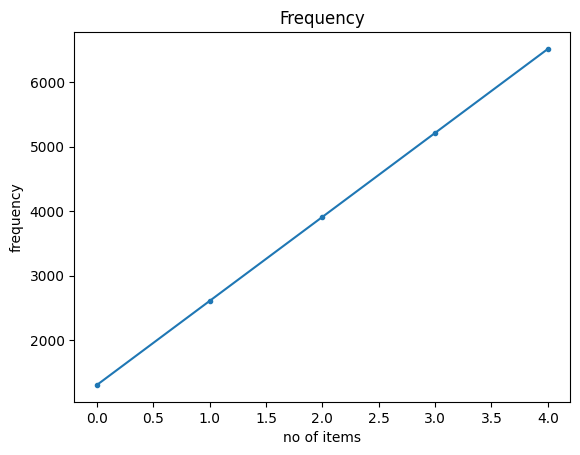

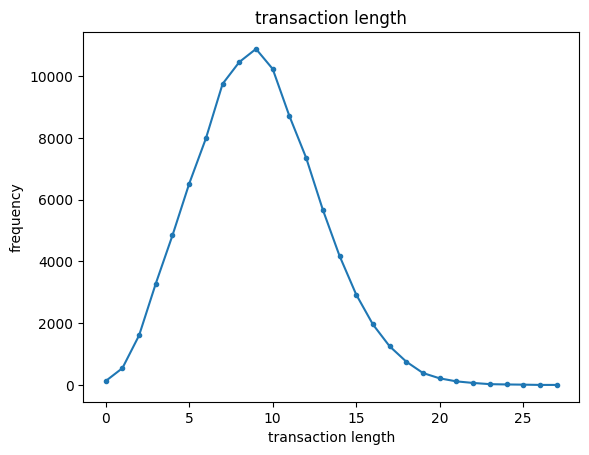

In [12]:
from PAMI.extras.dbStats import UtilityDatabase as stat

obj = stat.UtilityDatabase("Utility_T10I4D100K.csv")
obj.run()
obj.printStats()
obj.plotGraphs()